In [52]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [59]:
L = 5

In [79]:
Mp = L-2
dim_Ap = Mp**2
Ap = np.zeros((dim_Ap, dim_Ap))
for i in range(dim_Ap):
    Ap[i,i] = -5
    if i+1<dim_Ap:
        Ap[i+1, i] = 1
        Ap[i, i+1] = 1
    if L-2+i < dim_Ap:
        Ap[L-2+i, i] = 1
        Ap[i, L-2+i] = 1
for m in range(1,L-2):
        Ap[m*Mp, m*Mp-1] = 0
        Ap[m*Mp-1, m*Mp] = 0

A = np.pad(Ap, (L+1,0), "constant", constant_values=0)
A = np.pad(A, (0,L+1), "constant", constant_values=0)
for n in tqdm(range(2,L-1)):
    A = np.insert(A, n*L-1, 0, axis=0)
    A = np.insert(A, n*L-1, 0, axis=0)
    A = np.insert(A, n*L-1, 0, axis=1)
    A = np.insert(A, n*L-1, 0, axis=1)

A = A + np.eye(A.shape[0])

100%|██████████| 2/2 [00:00<?, ?it/s]


In [80]:
A[L+1,L] = 1
for i in range(1, L-1):
    A[i+L,i] = 1

In [81]:
A

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
      

In [73]:
dim_A = A.shape[0]
b = np.zeros(dim_A)
for i in range(1,L-1):
    b[i] = 1000

In [74]:
x_0 = np.zeros(dim_A)
for i in range(1,L-1):
    x_0[i] = 1000
print(x_0.shape)

(25,)


In [75]:
x_0

array([   0., 1000., 1000., 1000.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.])

In [76]:
def Jacobi_relaxation(A, b, x_0, epsilon_max = 0.001):
    """
    :param A: 2D Array of shape (n,n)
    :param b:
    :param x_0:
    :param epsilon_max:
    :return: x, num_iterations, np.max(epsilon_mat), np.mean(epsilon_mat)
    """
    x = x_0
    l = int(np.sqrt(A.shape[0]))
    D = np.diag(np.diag(A))
    D_inv = np.linalg.inv(D)
    J = np.matmul(D_inv, D-A)
    epsilon_mat = np.zeros((l-2)**2)
    epsilon_mat[int(0.5*(l-2)**2)] = 1
    num_iterations = 0
    #pbar = tqdm(desc="while loop", total = epsilon_max)
    while np.max(epsilon_mat) > epsilon_max:
        x = np.matmul(D_inv,b) + np.matmul(J,x)
        for r in range((l-2)**2):
            epsilon_mat[r] = np.abs(x[r+l]-0.25*(x[r+2*l]+x[r]+x[r+1+l]+x[r-1+l]))
        num_iterations += 1
        if num_iterations%100 == 0:
            print(np.max(epsilon_mat))
    return x, num_iterations, np.max(epsilon_mat), np.mean(epsilon_mat)

x_end_JR, num_iter_JR, err_max_JR, err_mean_JR = Jacobi_relaxation(A,b, x_0)

107.14285714285711
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714285714
107.14285714

KeyboardInterrupt: 

In [8]:
def Gauss_Seidel_relaxation(A, b, x_0, epsilon_max = 0.001):
    x = x_0
    l = int(np.sqrt(A.shape[0]))
    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    R = np.triu(A, 1)
    DL_inv = np.linalg.inv(D+L)
    J = np.matmul(DL_inv, R)
    epsilon_mat = np.ones((l-2)**2)
    num_iterations = 0
    while np.max(epsilon_mat) > epsilon_max:
        x = np.matmul(DL_inv,b) + np.matmul(J,x)
        for r in range((l-2)**2):
            epsilon_mat[r] = np.abs(x[r+l]-0.25*(x[r+2*l]+x[r]+x[r+1+l]+x[r-1+l]))
        num_iterations += 1
    return x, num_iterations, np.max(epsilon_mat), np.mean(epsilon_mat)

x_end_GSR, num_iter_GSR, err_max_GSR, err_mean_GSR = Gauss_Seidel_relaxation(A,b, x_0)

In [9]:
def SO_relaxation(A, b, x_0, epsilon_max = 0.001, w=1):
    x = x_0
    l = int(np.sqrt(A.shape[0]))
    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    R = np.triu(A, 1)
    DL_inv = np.linalg.inv(D+L)
    J = np.matmul(DL_inv, R)
    epsilon_mat = np.ones((l-2)**2)
    num_iterations = 0
    while np.max(epsilon_mat) > epsilon_max:
        x_GSR = np.matmul(DL_inv,b) + np.matmul(J,x)
        x = w*x_GSR+(1-w)*x
        if np.isnan(x).any() or np.isinf(x).any():
            print("NaN or Inf detected. Stopping simulation.")
            break
        for r in range((l-2)**2):
            epsilon_mat[r] = np.abs(x[r+l]-0.25*(x[r+2*l]+x[r]+x[r+1+l]+x[r-1+l]))
        num_iterations += 1
    return x, num_iterations, np.max(epsilon_mat), np.mean(epsilon_mat)

x_end_SOR_05, num_iter_SOR_05, err_max_SOR_05, err_mean_SOR_05 = SO_relaxation(A,b, x_0, w=0.5)

In [10]:
x_end_SOR_1, num_iter_SOR_1, err_max_SOR_1, err_mean_SOR_1 = SO_relaxation(A,b, x_0, w=1)

In [11]:
x_end_SOR_125, num_iter_SOR_125, err_max_SOR_125, err_mean_SOR_125 = SO_relaxation(A,b, x_0, w=1.25)

C:\Users\corin\AppData\Local\Temp\ipykernel_26612\1418011691.py:18: RuntimeWarning: overflow encountered in scalar add
  epsilon_mat[r] = np.abs(x[r+l]-0.25*(x[r+2*l]+x[r]+x[r+1+l]+x[r-1+l]))


NaN or Inf detected. Stopping simulation.


C:\Users\corin\AppData\Local\Temp\ipykernel_26612\1418011691.py:13: RuntimeWarning: overflow encountered in add
  x = w*x_GSR+(1-w)*x


In [12]:
x_end_SOR_15, num_iter_SOR_15, err_max_SOR_15, err_mean_SOR_15 = SO_relaxation(A,b, x_0, w=1.5)

C:\Users\corin\AppData\Local\Temp\ipykernel_26612\1418011691.py:18: RuntimeWarning: overflow encountered in scalar add
  epsilon_mat[r] = np.abs(x[r+l]-0.25*(x[r+2*l]+x[r]+x[r+1+l]+x[r-1+l]))
C:\Users\corin\AppData\Local\Temp\ipykernel_26612\1418011691.py:13: RuntimeWarning: overflow encountered in multiply
  x = w*x_GSR+(1-w)*x
C:\Users\corin\AppData\Local\Temp\ipykernel_26612\1418011691.py:13: RuntimeWarning: overflow encountered in add
  x = w*x_GSR+(1-w)*x


NaN or Inf detected. Stopping simulation.


In [13]:
x_end_SOR_175, num_iter_SOR_175, err_max_SOR_175, err_mean_SOR_175 = SO_relaxation(A,b, x_0, w=1.75)

NaN or Inf detected. Stopping simulation.


C:\Users\corin\AppData\Local\Temp\ipykernel_26612\1418011691.py:18: RuntimeWarning: overflow encountered in scalar add
  epsilon_mat[r] = np.abs(x[r+l]-0.25*(x[r+2*l]+x[r]+x[r+1+l]+x[r-1+l]))
C:\Users\corin\AppData\Local\Temp\ipykernel_26612\1418011691.py:13: RuntimeWarning: overflow encountered in add
  x = w*x_GSR+(1-w)*x


In [14]:
x_end_SOR_199, num_iter_SOR_199, err_max_SOR_199, err_mean_SOR_199 = SO_relaxation(A,b, x_0, w=1.99)

C:\Users\corin\AppData\Local\Temp\ipykernel_26612\1418011691.py:18: RuntimeWarning: overflow encountered in scalar add
  epsilon_mat[r] = np.abs(x[r+l]-0.25*(x[r+2*l]+x[r]+x[r+1+l]+x[r-1+l]))
C:\Users\corin\AppData\Local\Temp\ipykernel_26612\1418011691.py:13: RuntimeWarning: overflow encountered in multiply
  x = w*x_GSR+(1-w)*x
C:\Users\corin\AppData\Local\Temp\ipykernel_26612\1418011691.py:13: RuntimeWarning: overflow encountered in add
  x = w*x_GSR+(1-w)*x


NaN or Inf detected. Stopping simulation.


In [15]:
x_end_SOR_3, num_iter_SOR_3, err_max_SOR_3, err_mean_SOR_3 = SO_relaxation(A,b, x_0, w=3)

C:\Users\corin\AppData\Local\Temp\ipykernel_26612\1418011691.py:18: RuntimeWarning: overflow encountered in scalar add
  epsilon_mat[r] = np.abs(x[r+l]-0.25*(x[r+2*l]+x[r]+x[r+1+l]+x[r-1+l]))
C:\Users\corin\AppData\Local\Temp\ipykernel_26612\1418011691.py:13: RuntimeWarning: overflow encountered in multiply
  x = w*x_GSR+(1-w)*x
C:\Users\corin\AppData\Local\Temp\ipykernel_26612\1418011691.py:13: RuntimeWarning: overflow encountered in add
  x = w*x_GSR+(1-w)*x


NaN or Inf detected. Stopping simulation.


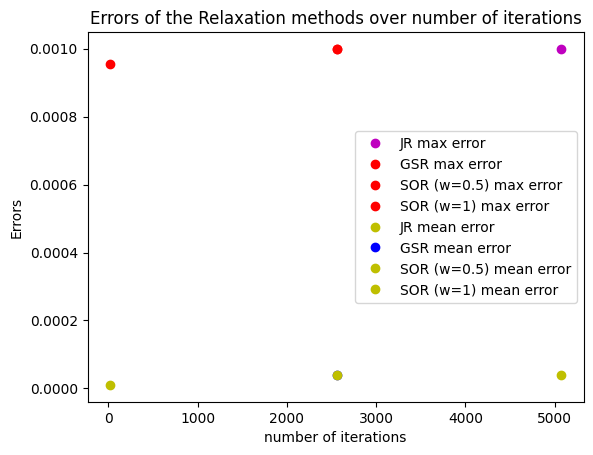

In [16]:
plt.plot(num_iter_JR, err_max_JR, "mo", label = "JR max error")
plt.plot(num_iter_GSR, err_max_GSR, "ro", label= "GSR max error")
#plt.plot(num_iter_SOR_3, err_max_SOR_3, "ro", label = "SOR (w=3) max error")
#plt.plot(num_iter_SOR_199, err_max_SOR_199, "ro", label = "SOR (w=1.99) max error")
#plt.plot(num_iter_SOR_175,err_max_SOR_175, "ro", label = "SOR (w=1.75) max error")
#plt.plot(num_iter_SOR_15, err_max_SOR_15, "ro", label = "SOR (w=1.5) max error")
plt.plot(num_iter_SOR_05, err_max_SOR_05, "ro", label = "SOR (w=0.5) max error")
plt.plot(num_iter_SOR_1, err_max_SOR_1, "ro", label = "SOR (w=1) max error")

plt.plot(num_iter_JR, err_mean_JR, "yo", label= "JR mean error")
plt.plot(num_iter_GSR, err_mean_GSR, "bo", label = "GSR mean error")
#plt.plot(num_iter_SOR_3, err_mean_SOR_3, "yo", label = "SOR (w=3) mean error")
#plt.plot(num_iter_SOR_199, err_mean_SOR_199, "yo", label = "SOR (w=1.99) mean error")
#plt.plot(num_iter_SOR_175,err_mean_SOR_175, "yo", label = "SOR (w=1.75) mean error")
#plt.plot(num_iter_SOR_15, err_mean_SOR_15, "yo", label = "SOR (w=1.5) mean error")
plt.plot(num_iter_SOR_05, err_mean_SOR_05, "yo", label = "SOR (w=0.5) mean error")
plt.plot(num_iter_SOR_1, err_mean_SOR_1, "yo", label = "SOR (w=1) mean error")

plt.title("Errors of the Relaxation methods over number of iterations")
plt.ylabel("Errors")
plt.xlabel("number of iterations")
plt.legend()

In [10]:
def potential_square(x, y, n_max):
    phi = 0
    for n in range(1,n_max):
        phi += (400/(n*np.pi))*np.sin(n*np.pi*y/L)*np.exp(-n*np.pi*x)
    return phi

arr_phi_1 = np.zeros((L,L))
arr_phi_10 = np.zeros((L,L)) 
arr_phi_100 = np.zeros((L,L))
arr_phi_1000 = np.zeros((L,L))

for i in range(L):
    for j in range(L):
        arr_phi_1[i][j] = potential_square(i,j,1)
        arr_phi_10[i][j] = potential_square(i,j,10)
        arr_phi_100[i][j] = potential_square(i,j,100)
        arr_phi_1000[i][j] = potential_square(i,j,1000)

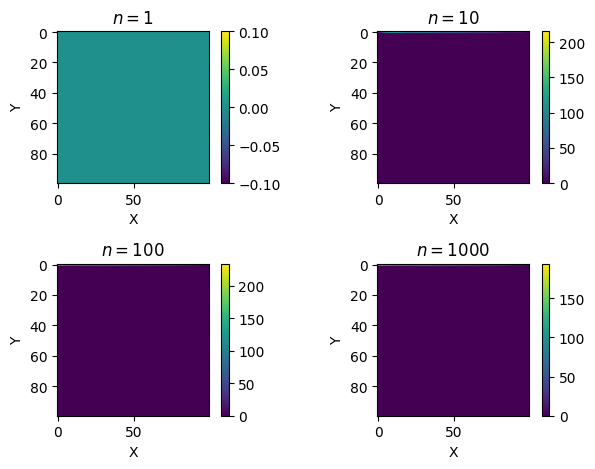

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2)

im1 = ax[0, 0].imshow(arr_phi_1)
im2 = ax[0, 1].imshow(arr_phi_10)
im3 = ax[1, 0].imshow(arr_phi_100)
im4 = ax[1, 1].imshow(arr_phi_1000)

cbar1 = fig.colorbar(im1, ax=ax[0, 0])
cbar2 = fig.colorbar(im2, ax=ax[0, 1])
cbar3 = fig.colorbar(im3, ax=ax[1, 0])
cbar4 = fig.colorbar(im4, ax=ax[1, 1])

ax[0, 0].set_xlabel('X')
ax[0, 0].set_ylabel('Y')
ax[0, 0].set_title("$n=1$")

ax[0, 1].set_xlabel('X')
ax[0, 1].set_ylabel('Y')
ax[0, 1].set_title("$n=10$")

ax[1, 0].set_xlabel('X')
ax[1, 0].set_ylabel('Y')
ax[1, 0].set_title("$n=100$")

ax[1, 1].set_xlabel('X')
ax[1, 1].set_ylabel('Y')
ax[1, 1].set_title("$n=1000$")

plt.tight_layout()
plt.show()

In [15]:
arr_phi_1000

array([[0.00000000e+000, 1.93955602e+002, 1.93975267e+002, ...,
        5.99699778e+000, 3.99799934e+000, 1.99899992e+000],
       [0.00000000e+000, 1.80628958e-001, 3.61054800e-001, ...,
        4.96439157e-001, 3.31198979e-001, 1.65671367e-001],
       [0.00000000e+000, 7.48250851e-003, 1.49575912e-002, ...,
        2.23346281e-002, 1.49019403e-002, 7.45462803e-003],
       ...,
       [0.00000000e+000, 1.80918187e-132, 3.61657830e-132, ...,
        5.42040561e-132, 3.61657830e-132, 1.80918187e-132],
       [0.00000000e+000, 7.81818376e-134, 1.56286519e-133, ...,
        2.34236965e-133, 1.56286519e-133, 7.81818376e-134],
       [0.00000000e+000, 3.37854354e-135, 6.75375286e-135, ...,
        1.01222971e-134, 6.75375286e-135, 3.37854354e-135]])

In [ ]:
x_end_JR_reshaped = x_end_JR.reshape((L,L))
fig_1, ax_1 = plt.subplots()
im = ax_1.imshow(x_end_JR_reshaped)
cbar = fig_1.colorbar(im, ax=ax_1)
plt.tight_layout()
plt.show()

In [ ]:
x_end_JR

In [73]:
x_b = np.matmul(A,x_0)
x_b[1100]

1.0